In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Pre Processing (Train)

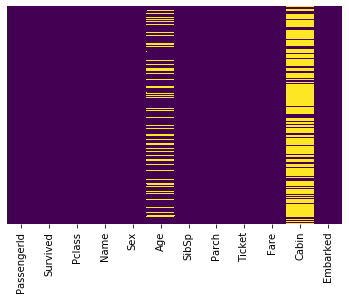

In [8]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

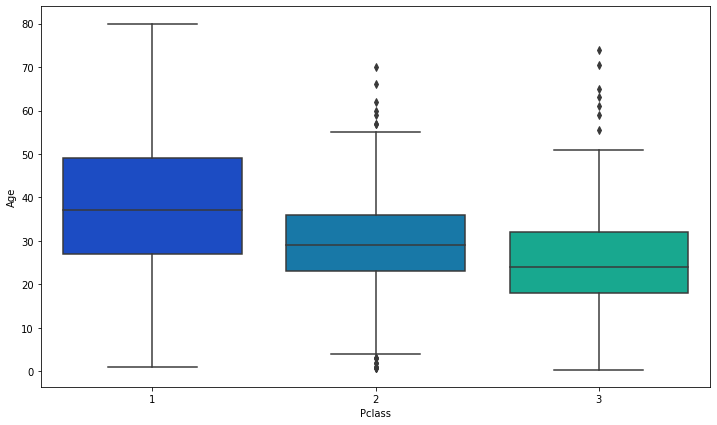

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [12]:
def age(cols):
    a=cols[0]
    c=cols[1]
    if pd.isnull(a):
        if c==1:return 37
        elif c==2:return 30
        elif c==3:return 23
    else:return a

In [13]:
df['Age']=df[['Age','Pclass']].apply(age,axis=1)

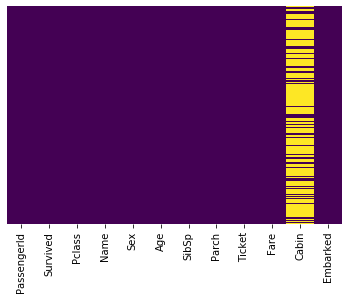

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.drop('Cabin',axis=1,inplace=True)

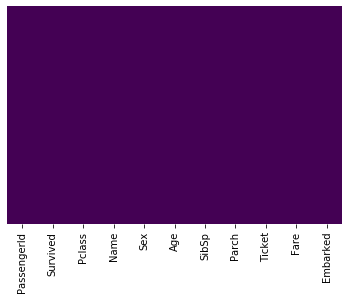

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [18]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [19]:
train=pd.concat([df,sex,embark],axis=1)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


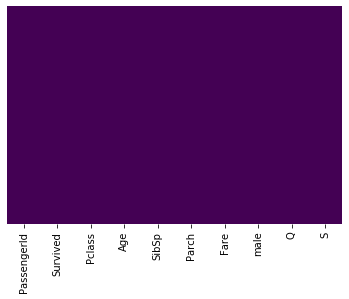

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Pre Processing (Test)

In [58]:
test=pd.read_csv('test.csv')

In [60]:
test['Age']=test[['Age','Pclass']].apply(age,axis=1)

In [61]:
test.drop('Cabin',axis=1,inplace=True)

In [63]:
sex=pd.get_dummies(test['Sex'],drop_first=True)
embark=pd.get_dummies(test['Embarked'],drop_first=True)

In [64]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [65]:
test=pd.concat([test,sex,embark],axis=1)

In [66]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,22.0,0,0,7.8292,1,1,0
1,893,3,38.0,1,0,7.0000,0,0,1
2,894,2,26.0,0,0,9.6875,1,1,0
3,895,3,35.0,0,0,8.6625,1,0,1
4,896,3,35.0,1,1,12.2875,0,0,1


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   male         418 non-null    uint8  
 7   Q            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [82]:
test=test.dropna(axis=0)

In [83]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,2.263789,28.072542,0.448441,0.393285,35.627188,0.635492,0.110312,0.645084
std,120.923774,0.842077,12.886719,0.897568,0.982419,55.907576,0.481870,0.313654,0.479063
min,892.000000,1.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.000000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,1101.000000,3.000000,25.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1205.000000,3.000000,36.000000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000
max,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


## Training Model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
lr=LogisticRegression()
rf=RandomForestClassifier(n_estimators=600)
dt=DecisionTreeClassifier()

In [91]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'], test_size=0.3, random_state=101)

In [92]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
dt.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTreeClassifier()

In [94]:
predlr=lr.predict(X_test)
predrf=rf.predict(X_test)
preddt=dt.predict(X_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print("Logistic Regression")
print(classification_report(y_test,predlr))
print("Random Forest")
print(classification_report(y_test,predrf))
print("Decision Tree")
print(classification_report(y_test,preddt))

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.62      0.69       114

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

Random Forest
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       154
           1       0.86      0.70      0.77       114

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.82      0.82       268

Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       154
           1       0.75      0.63      0.69       114

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.75   

In [97]:
test['Predicted Survival']=rf.predict(test)

In [98]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Predicted Survival
0,892,3,22.0,0,0,7.8292,1,1,0,0
1,893,3,38.0,1,0,7.0000,0,0,1,0
2,894,2,26.0,0,0,9.6875,1,1,0,0
3,895,3,35.0,0,0,8.6625,1,0,1,0
4,896,3,35.0,1,1,12.2875,0,0,1,1


In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test,predrf)

0.8246268656716418